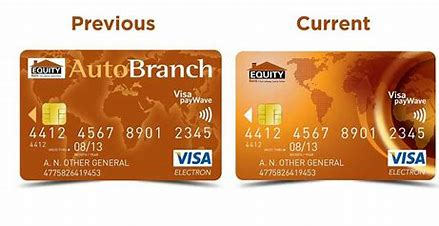

In [2]:
from IPython.display import Image, display

display(Image(filename='Quity.jpg'))

**What does credit card fraud detectipn mean?**                                                                             
Ans) Credit card fraud is a type of identity theft that involves using someone else's credit card information without their permission to make fraudulent purchases or transactions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Data Information

**Context:**
Credit card companies need to detect fraudulent transactions to prevent customers from being charged for unauthorized purchases.

**Content:**
Dataset: Transactions made by European cardholders in September 2013.
Duration: Two days, with 492 frauds out of 284,807 transactions.
Class Imbalance: Fraudulent transactions (positive class) account for 0.172% of all transactions.

**Features:**
Numerical input variables resulting from PCA transformation.
'Time': Seconds elapsed between each transaction and the first transaction.
'Amount': Transaction amount, suitable for cost-sensitive learning.
'Class': Response variable, 1 for fraud, 0 otherwise.

# Importing and Understanding the Data

In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Preprocessing

* As the data has no null values, we don't need to deal with it.
* Since the columns Time and Amount are not scaled, we will scale them.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

df[["Time","Amount"]] = scaler.fit_transform(df[["Time","Amount"]])

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Data Visualization

In [10]:
ones= df['Class'].value_counts()[0]/len(df)*100
print(f"percentage of records with class 1: {ones}")

percentage of records with class 1: 99.82725143693798


In [11]:
zeros= df['Class'].value_counts()[1]/len(df)*100
print(f"percentage of records with class 1: {zeros}")

percentage of records with class 1: 0.1727485630620034


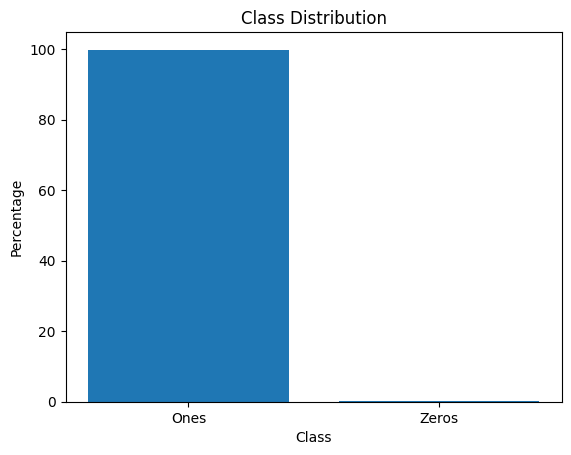

In [12]:
import matplotlib.pyplot as plt


plt.bar(["Ones","Zeros"], [ones,zeros])
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Distribution')
plt.show()

/tmp/ipykernel_18/3224318604.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Time"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


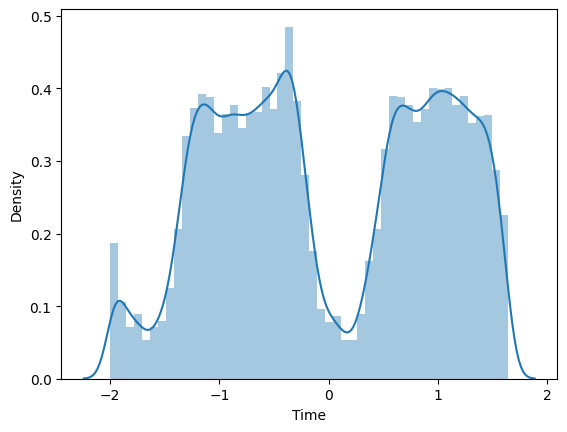

In [13]:
import seaborn as sns

sns.distplot(df["Time"])
plt.show()

In [14]:
df['Time'].skew()

-0.035567618006321

/tmp/ipykernel_18/4288776029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


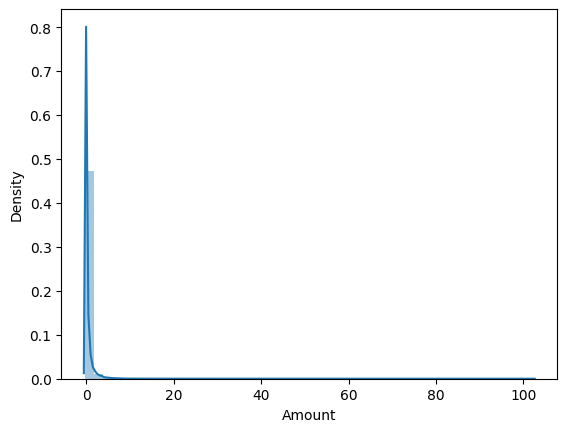

In [15]:
sns.distplot(df['Amount'])
plt.show()

In [16]:
df['Amount'].skew()

16.977724453761013

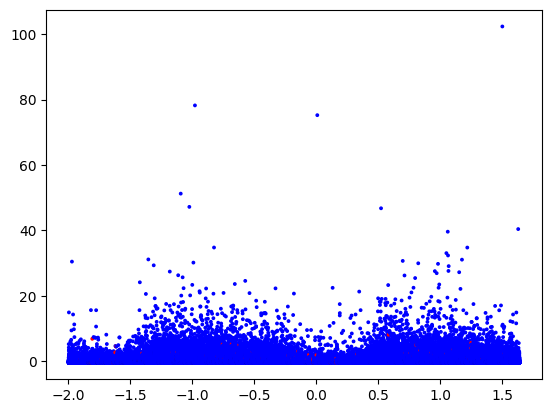

In [17]:
colors = ['blue' if c == 0 else 'red' for c in df['Class']]

plt.scatter(df['Time'], df['Amount'], s=3, c=colors)

# Undersampling

In [18]:
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]                                                                          

In [19]:
df_minority.shape[0]

492

In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])

In [21]:
y_resampled

138028    0
63099     0
73411     0
164247    0
148999    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [22]:
y_resampled=y_resampled.to_numpy()#As the data is in series
y_resampled=y_resampled.reshape(-1,1)#-1 indicates that it takes column length based on other attribute

In [23]:
y_resampled.shape

(984, 1)

In [24]:
y_resampled.dtype

dtype('int64')

In [25]:
resampled=np.concatenate((X_resampled, y_resampled),axis=1)

In [26]:
import pandas as pd
df_un=pd.DataFrame(resampled)

In [27]:
df_un.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.260357,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,-0.350191,0.0
1,-0.932021,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,-0.336517,0.0
2,-0.835765,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,-0.293258,0.0
3,0.458181,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,-0.125338,0.0
4,-0.092231,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,-0.353229,0.0


In [28]:
df_un.columns=df.columns #Replacing the column names with actual column names

In [29]:
df_un

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260357,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,-0.350191,0.0
1,-0.932021,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,-0.336517,0.0
2,-0.835765,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,-0.293258,0.0
3,0.458181,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,-0.125338,0.0
4,-0.092231,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,-0.353229,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.565196,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1.0
980,1.569513,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1.0
981,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1.0
982,1.582548,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1.0


# Outliers Detection Using Data Visualization

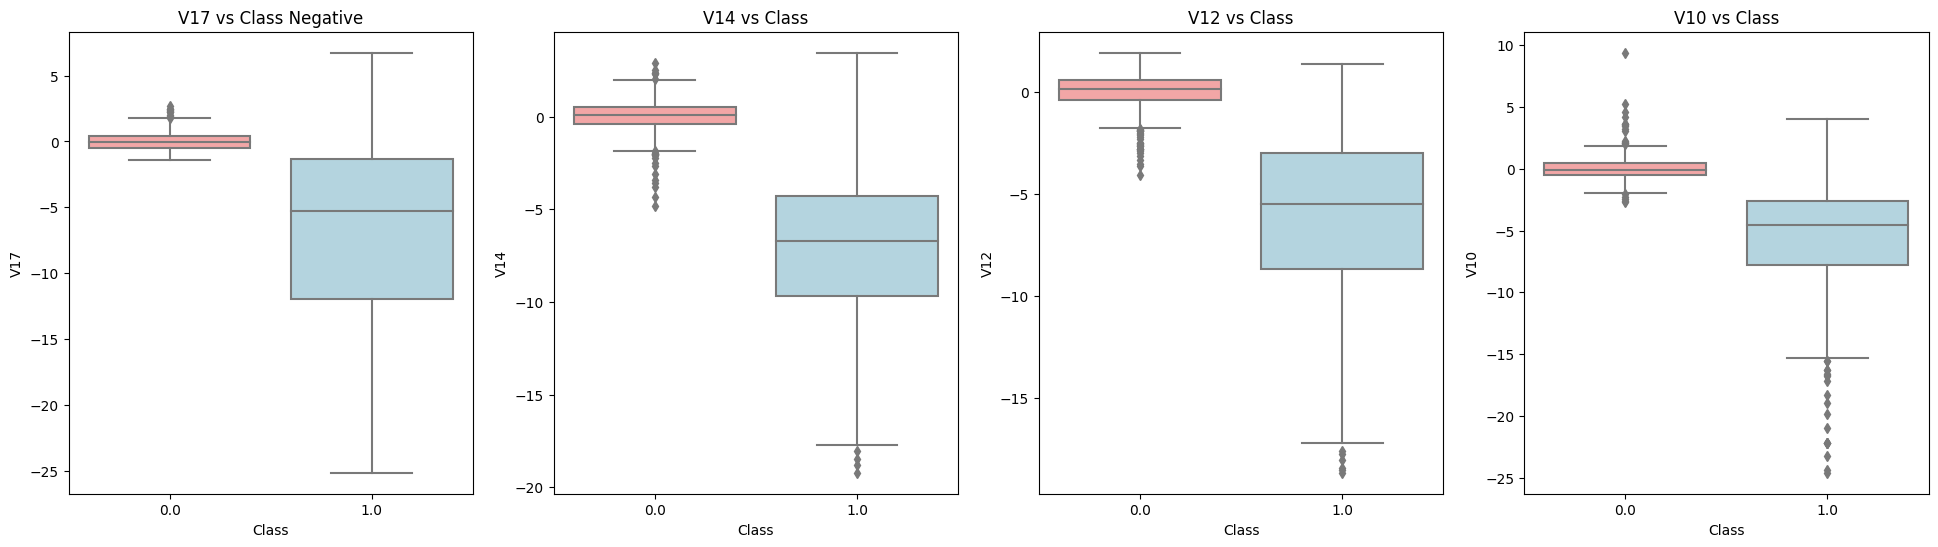

In [30]:
colors = {0: "#FF9999",  # Dark blue
          1: "#ADD8E6"}  # Dark red
f, axes = plt.subplots(ncols=4, figsize=(24,6))


sns.boxplot(x="Class", y="V17", data=df_un, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative')

sns.boxplot(x="Class", y="V14", data=df_un, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.boxplot(x="Class", y="V12", data=df_un, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class')


sns.boxplot(x="Class", y="V10", data=df_un, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class')

plt.show()

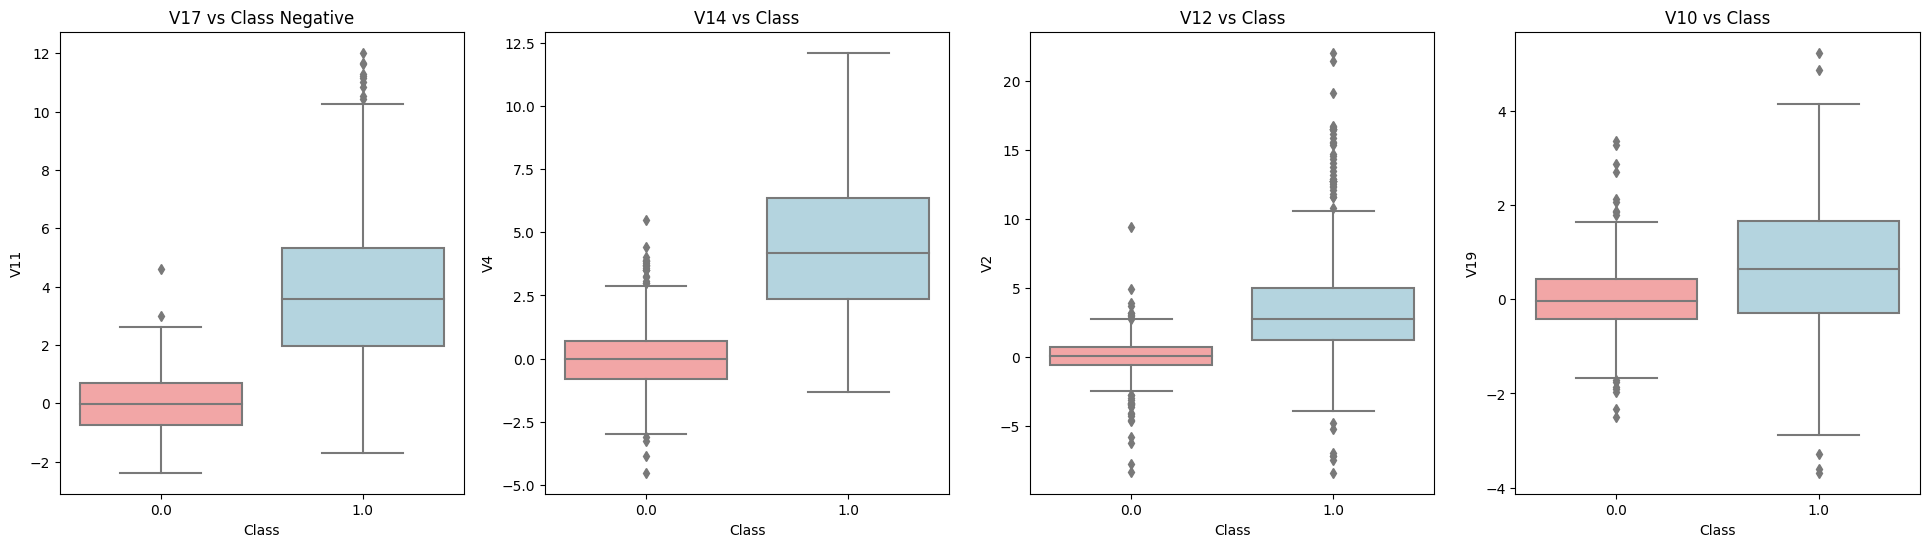

In [31]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))


sns.boxplot(x="Class", y="V11", data=df_un, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative')

sns.boxplot(x="Class", y="V4", data=df_un, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.boxplot(x="Class", y="V2", data=df_un, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class')


sns.boxplot(x="Class", y="V19", data=df_un, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class')

plt.show()

In [32]:
outliers_count = {}#To store overall outliers of all features along with class

# Iterate over each feature (excluding the 'class' column)
for feature in df_un.columns[df_un.columns != 'Class']:
    feature_outliers = {}#To store outliers of current feature for class 0 and 1
   
    for cls in [0,1]:#Iterating over each class and finding outliers for a feature
        # Selecting the data points for the current class and feature
        data_points = df_un[df_un['Class'] == cls][feature]
        
        Q1 = np.percentile(data_points, 25)
        Q3 = np.percentile(data_points, 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers for the current class and feature
        num_outliers = ((data_points < lower_bound) | (data_points > upper_bound)).sum()
        
    
        feature_outliers[f'Class {cls}'] = num_outliers # Outliers of current feature's class 0 and 1
    
    outliers_count[feature] = feature_outliers #Outliers of class 1 and class 0 for each feature

In [33]:
outliers_count

{'Time': {'Class 0': 0, 'Class 1': 0},
 'V1': {'Class 0': 7, 'Class 1': 52},
 'V2': {'Class 0': 29, 'Class 1': 46},
 'V3': {'Class 0': 2, 'Class 1': 53},
 'V4': {'Class 0': 23, 'Class 1': 0},
 'V5': {'Class 0': 28, 'Class 1': 45},
 'V6': {'Class 0': 41, 'Class 1': 15},
 'V7': {'Class 0': 12, 'Class 1': 30},
 'V8': {'Class 0': 43, 'Class 1': 98},
 'V9': {'Class 0': 16, 'Class 1': 17},
 'V10': {'Class 0': 20, 'Class 1': 19},
 'V11': {'Class 0': 2, 'Class 1': 10},
 'V12': {'Class 0': 28, 'Class 1': 6},
 'V13': {'Class 0': 8, 'Class 1': 0},
 'V14': {'Class 0': 22, 'Class 1': 4},
 'V15': {'Class 0': 2, 'Class 1': 8},
 'V16': {'Class 0': 10, 'Class 1': 0},
 'V17': {'Class 0': 10, 'Class 1': 0},
 'V18': {'Class 0': 13, 'Class 1': 0},
 'V19': {'Class 0': 16, 'Class 1': 5},
 'V20': {'Class 0': 54, 'Class 1': 41},
 'V21': {'Class 0': 27, 'Class 1': 49},
 'V22': {'Class 0': 1, 'Class 1': 24},
 'V23': {'Class 0': 28, 'Class 1': 59},
 'V24': {'Class 0': 12, 'Class 1': 3},
 'V25': {'Class 0': 15, 'C

In [34]:
for feature, counts in outliers_count.items():
    print(f"Feature: {feature}")
    for cls, num_outliers in counts.items():
        print(f" {cls}: {num_outliers} outliers")
    print()

Feature: Time
 Class 0: 0 outliers
 Class 1: 0 outliers

Feature: V1
 Class 0: 7 outliers
 Class 1: 52 outliers

Feature: V2
 Class 0: 29 outliers
 Class 1: 46 outliers

Feature: V3
 Class 0: 2 outliers
 Class 1: 53 outliers

Feature: V4
 Class 0: 23 outliers
 Class 1: 0 outliers

Feature: V5
 Class 0: 28 outliers
 Class 1: 45 outliers

Feature: V6
 Class 0: 41 outliers
 Class 1: 15 outliers

Feature: V7
 Class 0: 12 outliers
 Class 1: 30 outliers

Feature: V8
 Class 0: 43 outliers
 Class 1: 98 outliers

Feature: V9
 Class 0: 16 outliers
 Class 1: 17 outliers

Feature: V10
 Class 0: 20 outliers
 Class 1: 19 outliers

Feature: V11
 Class 0: 2 outliers
 Class 1: 10 outliers

Feature: V12
 Class 0: 28 outliers
 Class 1: 6 outliers

Feature: V13
 Class 0: 8 outliers
 Class 1: 0 outliers

Feature: V14
 Class 0: 22 outliers
 Class 1: 4 outliers

Feature: V15
 Class 0: 2 outliers
 Class 1: 8 outliers

Feature: V16
 Class 0: 10 outliers
 Class 1: 0 outliers

Feature: V17
 Class 0: 10 outliers


In [35]:
features = list(outliers_count.keys())
class_0_outliers=[]
class_1_outliers=[]
for feature in features:
    class_0_outliers.append(outliers_count[feature]['Class 0'])
    class_1_outliers.append(outliers_count[feature]['Class 1'])

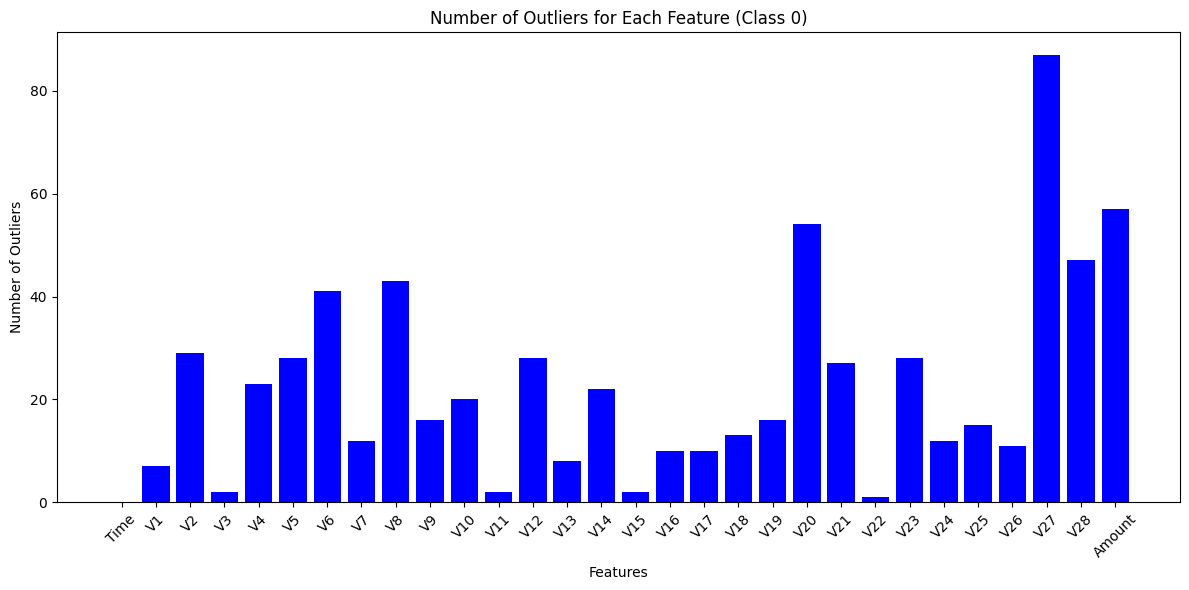

In [36]:
# Plot for Class 0
plt.figure(figsize=(12, 6))
plt.bar(features, class_0_outliers, color='blue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers for Each Feature (Class 0)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

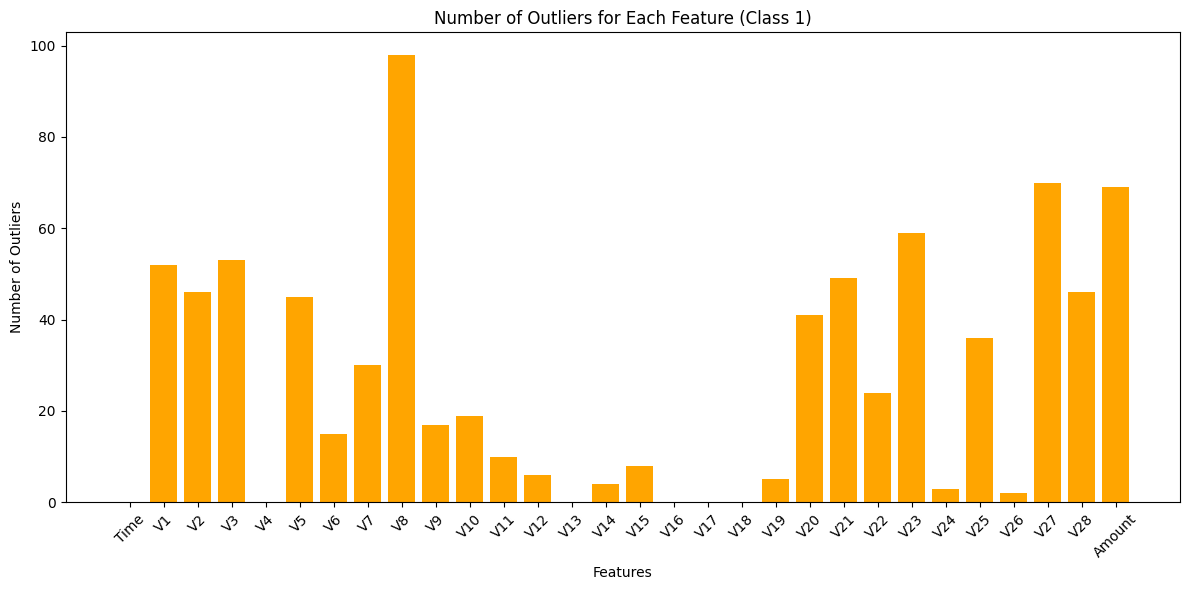

In [37]:
# Plot for Class 1
plt.figure(figsize=(12, 6))
plt.bar(features, class_1_outliers, color='orange')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers for Each Feature (Class 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Outliers can hold valuable information about new spending patterns or fraud tactics. Removing them might limit the model's ability to adapt to evolving fraud schemes.
* Outliers in credit card transactions could be genuine indicators of fraud, especially large or unusual purchases. Removing them might lead to missing actual fraud cases.


# Feature Engineering

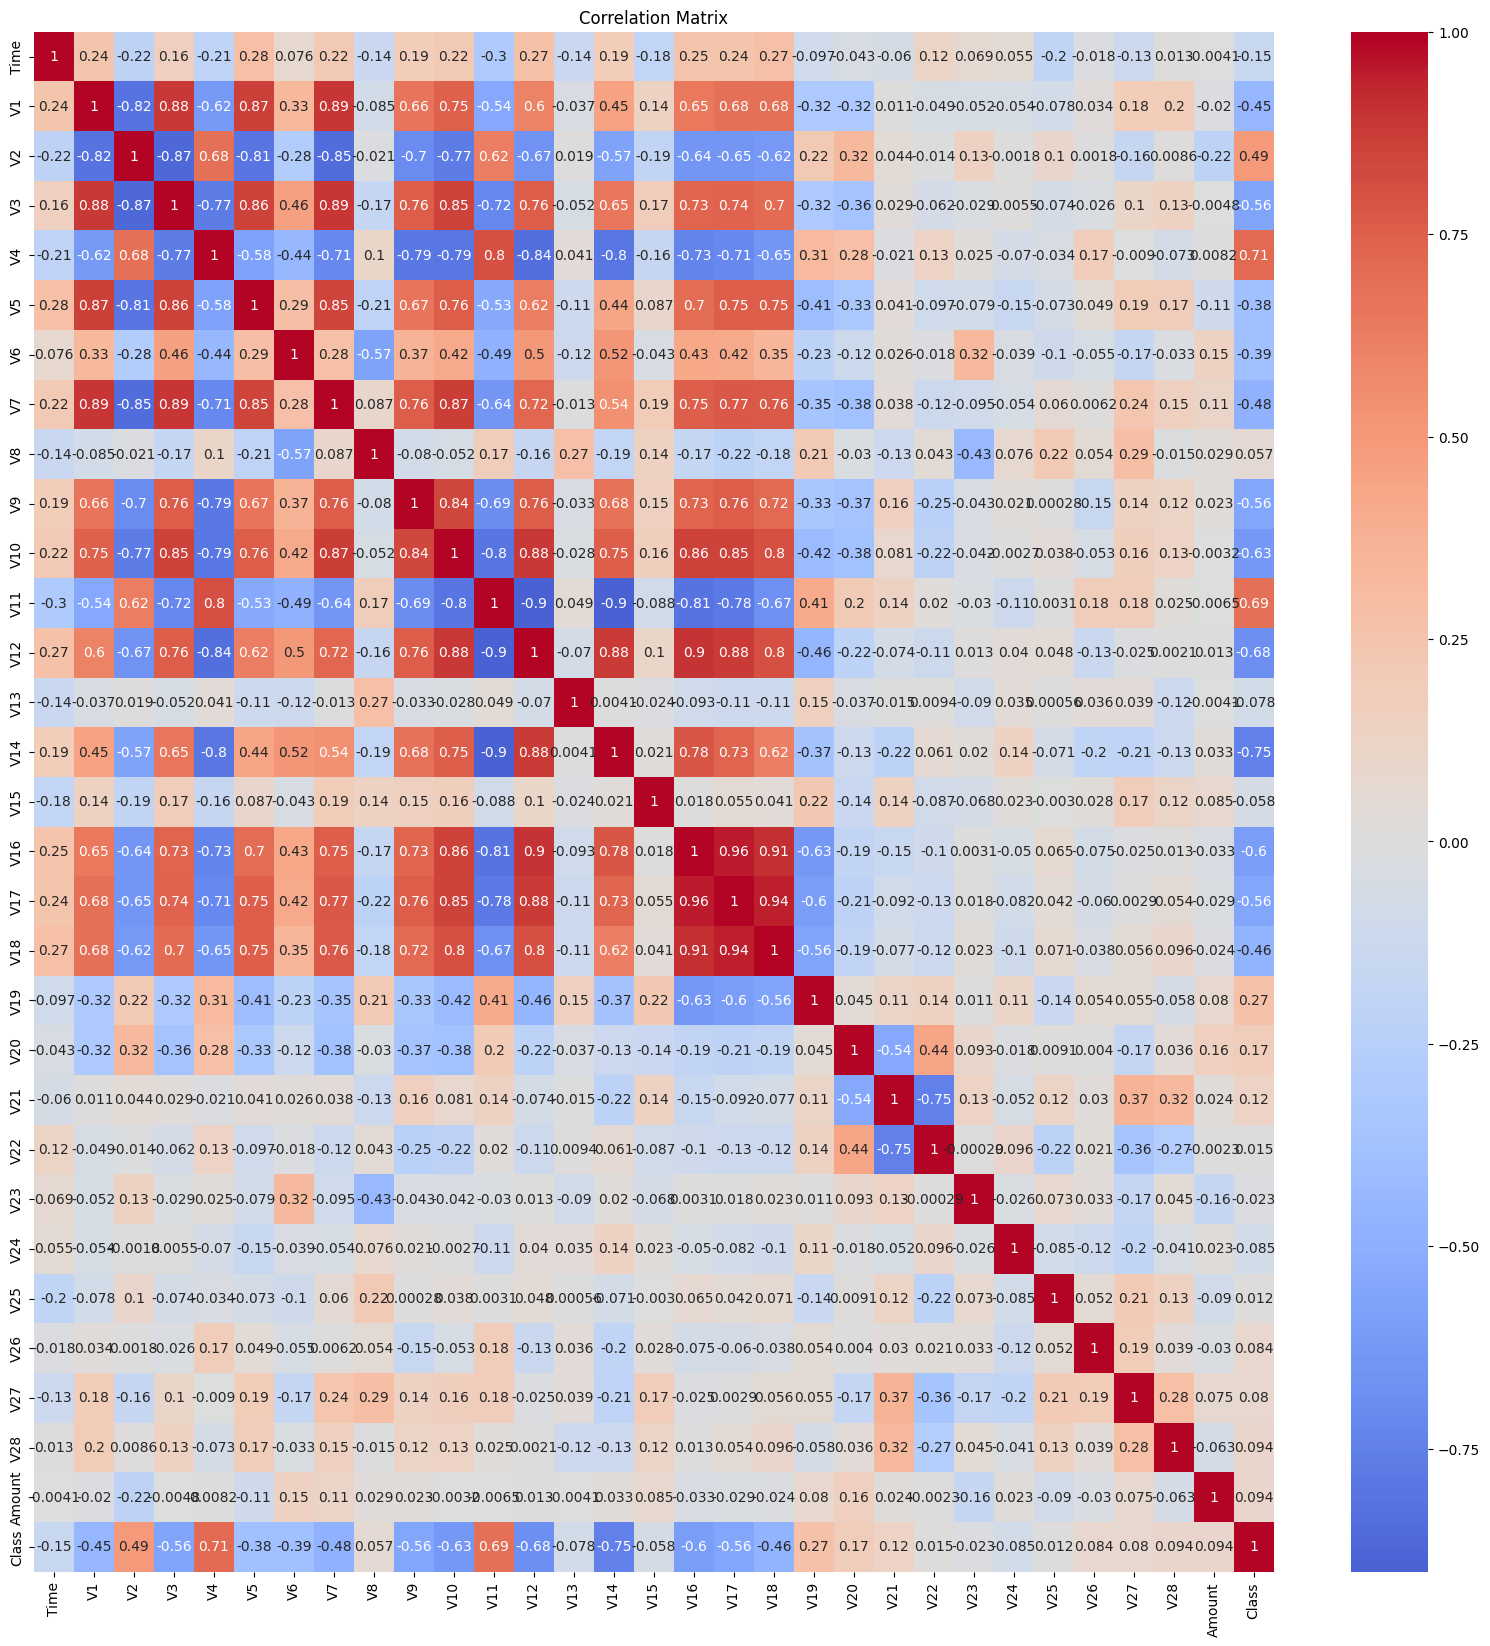

In [38]:
correlation_matrix = df_un.corr()


plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [39]:
columns=df_un.columns

In [40]:
correlation_dict = {}
for i in range(0, 31):
    correlated_features = []#Stores all the correlated feartures of i th column
    for j in range(i + 1, 31):
        if correlation_matrix.loc[columns[i], columns[j]] > 0.9:
            correlated_features.append(columns[j])
    if correlated_features:#To store in dictionary only if there exsits correlated features for a feature
        correlation_dict[columns[i]] = correlated_features
correlation_dict

{'V12': ['V16'], 'V16': ['V17', 'V18'], 'V17': ['V18']}

From the above answer, we can understand that if we keep 16, then 12,17,18 can be removed

In [41]:
df_unsam=df_un.drop(columns=['V12','V17','V18'])

In [42]:
df_unsam.shape

(984, 28)

In [43]:
df_unsam

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260357,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,-0.350191,0.0
1,-0.932021,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,-0.336517,0.0
2,-0.835765,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,-0.293258,0.0
3,0.458181,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,-0.125338,0.0
4,-0.092231,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,-0.353229,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.565196,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1.0
980,1.569513,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1.0
981,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1.0
982,1.582548,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1.0


# Data Visualization of Sampled Data

<function matplotlib.pyplot.show(close=None, block=None)>

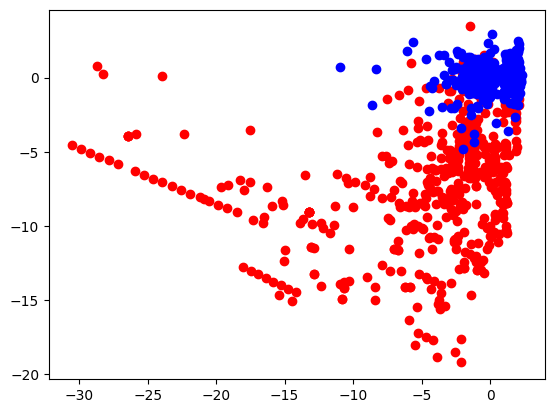

In [44]:
plt.scatter(df_unsam['V1'][df_unsam.Class==1],df_unsam['V14'][df_unsam.Class==1],c='r')
plt.scatter(df_unsam[df_unsam.Class==0]['V1'],df_unsam[df_unsam.Class==0]['V14'],c='b')
plt.show

# Splitting Dataset

In [45]:
X=df_unsam.iloc[:,:-1]
y=df_unsam.iloc[:,-1]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.shape

(787, 27)

In [48]:
X_test.shape

(197, 27)

# Training a Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier(n_estimators=100,random_state=12)
rfc.fit(X_train,y_train)
y_pre=rfc.predict(X_test)

# Model Evaluation

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,roc_curve, auc

In [52]:
accuracy = accuracy_score(y_test, y_pre)
precision = precision_score(y_test, y_pre)  
recall = recall_score(y_test, y_pre) 

print(f"Accuracy score= {accuracy}")
print(f"Precision= {precision}")
print(f"Recall= {recall}")

Accuracy score= 0.9238578680203046
Precision= 0.9560439560439561
Recall= 0.8877551020408163


In [53]:
cm = confusion_matrix(y_test, y_pre)
cm

array([[95,  4],
       [11, 87]])

We can see there are 11 False Negatives, we need to reduce this count

# Reducing False Negatives

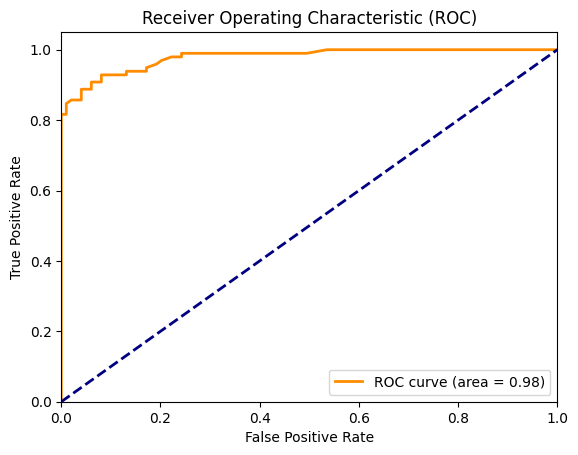

In [54]:
y_probs = rfc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)#TPR and FPR at various Thresholds
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [55]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.95, 0.92, 0.91, 0.89, 0.87, 0.86, 0.79,
       0.77, 0.74, 0.64, 0.61, 0.52, 0.49, 0.4 , 0.38, 0.35, 0.29, 0.28,
       0.27, 0.24, 0.23, 0.22, 0.21, 0.19, 0.18, 0.16, 0.15, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01,
       0.  ])

In [56]:
optimal_idx = np.argmax(tpr)
optimal_threshold1 = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold1:.2f}")

Optimal Threshold: 0.06


The optimal **threshold** to get high recall value is **0.06**, but this threshold will reduce the **precision and accuracy**                                              
Let's see the value of **precision, accuracy and recall** at threshold value of 0.06

In [57]:
y_pred_adjusted1 = (y_probs >= optimal_threshold1).astype(int)

In [58]:
# Calculate metrics with the adjusted threshold
accuracy1 = accuracy_score(y_test, y_pred_adjusted1)
precision1 = precision_score(y_test, y_pred_adjusted1)
recall1 = recall_score(y_test, y_pred_adjusted1)

# Print the metrics
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")

Accuracy: 0.73
Precision: 0.65
Recall: 1.00


In [59]:
cm = confusion_matrix(y_test, y_pred_adjusted1)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[46 53]
 [ 0 98]]


As choosing the optimal threshold to get **high recall** is reducing the **precision and accuracy**, let's take **F1 score** as metrix to reduce False Negatives and have better precision and accuracy

In [60]:
def f1_score_optimal_threshold(y_actual, y_probs, thresholds):
    best_f1 = 0
    best_threshold = 0
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        f1 = 2 * (precision_score(y_actual, y_pred) * recall_score(y_actual, y_pred)) / (precision_score(y_actual, y_pred) + recall_score(y_actual, y_pred))
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold,best_f1


optimal_threshold,optimal_f1 = f1_score_optimal_threshold(y_test, y_probs, thresholds)
print(f"Optimal Threshold (based on F1 score): {optimal_threshold:.2f}")
print(f"Optimal F1 score: {optimal_f1:.2f}")


y_pred_adjusted = (y_probs >= optimal_threshold).astype(int) #finding the predicted y for optimal thereshold

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_18/2972930910.py:6: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision_score(y_actual, y_pred) * recall_score(y_actual, y_pred)) / (precision_score(y_actual, y_pred) + recall_score(y_actual, y_pred))


Optimal Threshold (based on F1 score): 0.35
Optimal F1 score: 0.92


In [61]:
# Calculating metrics for adjusted threshold is
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)

# Printing the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.92
Precision: 0.92
Recall: 0.93


In [62]:
# Confusion matrix for adjusted model
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[91  8]
 [ 7 91]]


Here we reduced the **False Negatives**

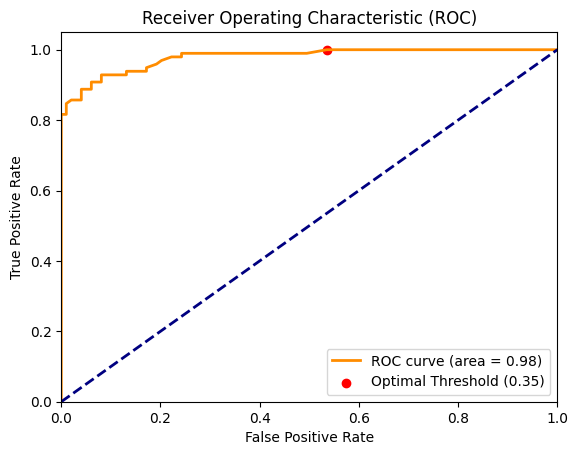

In [63]:
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[np.argmax(tpr)], tpr[np.argmax(tpr)], color='red', marker='o', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()